In [7]:
#Importando a biblioteca
import pandas as pd
# Informar ao matplotlib sobre grafico inline
%matplotlib inline

In [8]:
df = pd.read_csv('sih-janeiro-2017-cirurgias-eletiva-e-emergencia.csv', sep=';'
                 ,encoding='cp1252',usecols=[3,6,7,8,12,14])

df.columns = ['Hospital','Municipio','Complexidade','Cacater','Sub grupo', 'Procedimento']

df.head(3)



,Hospital,Municipio,Complexidade,Cacater,Sub grupo,Procedimento
0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS


In [9]:
df.describe()

,Hospital,Municipio,Complexidade,Cacater,Sub grupo,Procedimento
count,4862,4862,4862,4862,4862,4862
unique,16,11,2,4,16,495
top,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
freq,735,1923,4353,3794,1539,1060


In [13]:
df['Hospital'].unique()

array(['6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB',
       '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL',
       '0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA', '0010545 HRBZ',
       '0010480 HOSPITAL REGIONAL DE CEILANDIA',
       '3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL',
       '0010472 HRG', '0010510 HOSPITAL UNIVERSITARIO DE BRASILIA',
       '0010529 HRPL',
       '0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB',
       '3055450 CBV CENTRO BRASILEIRO DA VISAO',
       '2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA', '0010502 HRS',
       '5717515 HRSM', '2645157 HRPA', '0010464 HRAN'], dtype=object)

In [10]:
df['Sub grupo'].value_counts()

Sub Grupo: 11 - Cirurgia obstétrica                                                   1539
Sub Grupo: 07 - Cirurgia do aparelho digestivo, orgãos anexos e parede abdominal       893
Sub Grupo: 08 - Cirurgia do sistema osteomuscular                                      651
Sub Grupo: 09 - Cirurgia do aparelho geniturinário                                     474
Sub Grupo: 06 - Cirurgia do aparelho circulatório                                      299
Sub Grupo: 15 - Outras cirurgias                                                       223
Sub Grupo: 04 - Cirurgia das vias aéreas superiores, da cabeça e do pescoço            145
Sub Grupo: 03 - Cirurgia do sistema nervoso central e periférico                       141
Sub Grupo: 16 - Cirurgia em oncologia                                                  110
Sub Grupo: 05 - Cirurgia do aparelho da visão                                           98
Sub Grupo: 12 - Cirurgia torácica                                                       92

In [20]:
df['Hospital'].value_counts()

0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL           735
0010472 HRG                                                 555
0010480 HOSPITAL REGIONAL DE CEILANDIA                      461
0010464 HRAN                                                432
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA                 373
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA                  350
2645157 HRPA                                                327
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB          298
5717515 HRSM                                                281
0010529 HRPL                                                256
0010502 HRS                                                 225
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA                195
3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL        191
0010545 HRBZ                                                 75
6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB     74
3055450 CBV CENTRO BRASILEIRO DA VISAO  

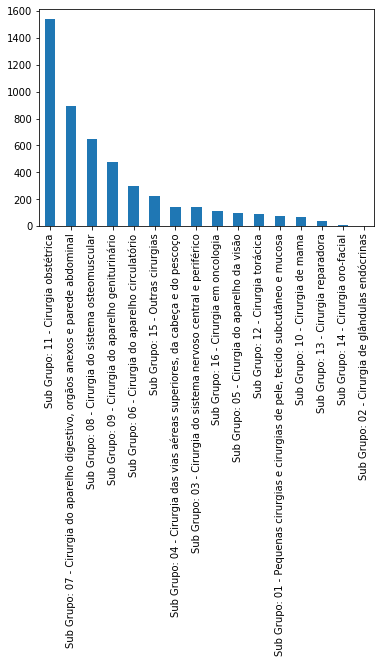

In [22]:
df['Sub grupo'].value_counts().plot.bar()

In [12]:
# vamos criar um subconjunto dos dados originais
df_hospbase = df[df['Hospital']=='0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL']

# linhas iniciais
df_hospbase.head(2)

,Hospital,Municipio,Complexidade,Cacater,Sub grupo,Procedimento
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS


In [21]:
 df_hospbase['Procedimento'].value_counts()

TRATAMENTO C/ CIRURGIAS MULTIPLAS                                         47
TRAQUEOSTOMIA                                                             28
DERIVACAO VENTRICULAR PARA PERITONEO / ATRIO / PLEURA / RAQUE             26
TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA                                 23
IMPLANTE DE MARCAPASSO DE CAMARA DUPLA TRANSVENOSO                        21
                                                                          ..
REDUÇÃO DE FRATURA DA MAXILA  - LE FORT II, SEM OSTEOSSÍNTESE              1
TRATAMENTO CIRURGICO DE VARIZES (UNILATERAL)                               1
CRANIOTOMIA PARA RETIRADA DE CISTO / ABSCESSO / GRANULOMA ENCEFALICO       1
ARITENOIDECTOMIA COM LARINGOFISSURA                                        1
REDUÇÃO INCRUENTA DE LUXAÇÃO COXOFEMORAL TRAUMÁTICA / PÓS-ARTROPLASTIA     1
Name: Procedimento, Length: 242, dtype: int64

In [22]:
# podemos fatiar o df com pedaço de balavra
df_hospbase[df_hospbase['Procedimento'].str.contains('AMPUTA')].count()

Hospital        33
Municipio       33
Complexidade    33
Cacater         33
Sub grupo       33
Procedimento    33
dtype: int64

In [23]:
# Dividir o df original apenas pelo procedimento de parto cesariano
df_parto_cesariando = df[df['Procedimento']=='PARTO CESARIANO']
# primeiras linhas 
df_parto_cesariando.head()

,Hospital,Municipio,Complexidade,Cacater,Sub grupo,Procedimento
130,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
131,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
132,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
133,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
141,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO


In [24]:
# Verificar a quantidade de partos cesarianos por hospital
df_parto_cesariando['Hospital'].value_counts()

0010480 HOSPITAL REGIONAL DE CEILANDIA                165
2645157 HRPA                                          123
5717515 HRSM                                          110
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB     93
0010502 HRS                                            92
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA           92
0010464 HRAN                                           88
0010529 HRPL                                           79
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA            74
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA             63
0010472 HRG                                            47
0010545 HRBZ                                           34
Name: Hospital, dtype: int64

In [25]:
# Verificar a quantidade de partos por caracter de atendimento
df_parto_cesariando['Cacater'].value_counts()

Urgência    1041
Eletivo       19
Name: Cacater, dtype: int64

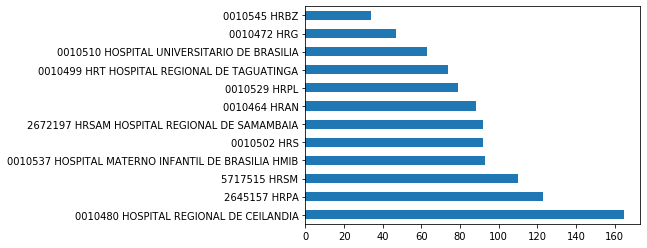

In [27]:
df_parto_cesariando['Hospital'].value_counts().plot.barh()

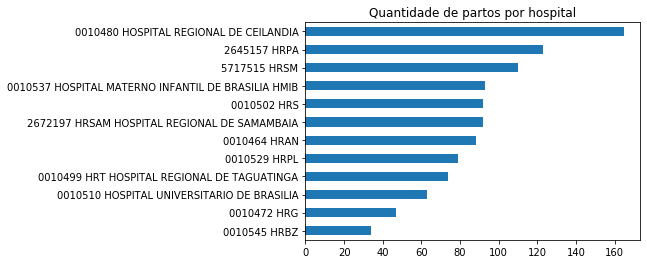

In [30]:
#Melhorando o grafico
#Inverter a ordem e colocar titulo
df_parto_cesariando['Hospital'].value_counts(ascending=True).plot.barh(title='Quantidade de partos por hospital')